In [14]:
import cv2
import os
import glob
from PIL import Image
from pathlib import Path
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
from torchvision import transforms
import torch
import numpy as np

In [1]:
def letterbox(im, new_shape=(640, 640), color=(114, 114, 114), auto=True, scaleFill=False, scaleup=True, stride=32):
    # Resize and pad image while meeting stride-multiple constraints
    shape = im.shape[:2]  # current shape [height, width]
    if isinstance(new_shape, int):
        new_shape = (new_shape, new_shape)

    # Scale ratio (new / old)
    r = min(new_shape[0] / shape[0], new_shape[1] / shape[1])
    if not scaleup:  # only scale down, do not scale up (for better val mAP)
        r = min(r, 1.0)

    # Compute padding
    ratio = r, r  # width, height ratios
    new_unpad = int(round(shape[1] * r)), int(round(shape[0] * r))
    dw, dh = new_shape[1] - new_unpad[0], new_shape[0] - new_unpad[1]  # wh padding
    if auto:  # minimum rectangle
        dw, dh = np.mod(dw, stride), np.mod(dh, stride)  # wh padding
    elif scaleFill:  # stretch
        dw, dh = 0.0, 0.0
        new_unpad = (new_shape[1], new_shape[0])
        ratio = new_shape[1] / shape[1], new_shape[0] / shape[0]  # width, height ratios

    dw /= 2  # divide padding into 2 sides
    dh /= 2

    if shape[::-1] != new_unpad:  # resize
        im = cv2.resize(im, new_unpad, interpolation=cv2.INTER_LINEAR)
    top, bottom = int(round(dh - 0.1)), int(round(dh + 0.1))
    left, right = int(round(dw - 0.1)), int(round(dw + 0.1))Z
    im = cv2.copyMakeBorder(im, top, bottom, left, right, cv2.BORDER_CONSTANT, value=color)  # add border
    return im, ratio, (dw, dh)

In [78]:
ena_local = 'C:/temp/ena/images/train100/'
save_loc = 'C:/temp/ena/images/256train100/'
images = [os.path.split(i)[1] for i in glob.glob(ena_local + '/*.jpg', recursive=True)]

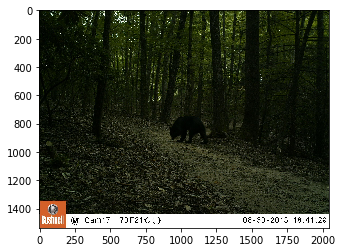

In [59]:
img = Image.open(ena_local + images[5433])
plt.imshow(img, interpolation='nearest')

In [61]:
npimg = np.asarray(img)

In [71]:
data = letterbox(npimg, (256,256), auto=True)[0]

In [72]:
data.shape

(192, 256, 3)

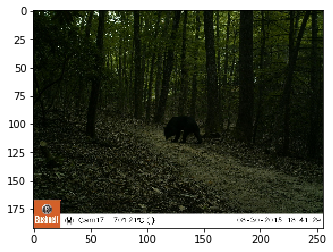

In [73]:
plt.imshow(data, interpolation='nearest')
plt.show()

In [64]:
data2 = letterbox(data, (64, 64))[0]

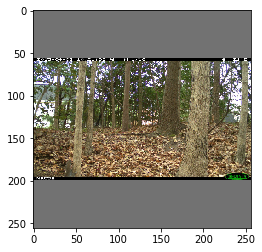

In [76]:
plt.imshow(data2, interpolation='nearest')
plt.show()

In [82]:
for im in images:
    npimg = np.asarray(Image.open(ena_local + im))
    reshaped = letterbox(npimg, (256,256), auto=False)[0]
    rim = Image.fromarray(reshaped)
    rim.save(save_loc + im)

numpy.ndarray

In [66]:
# LABELS

In [ ]:
def xywhn2xyxy(x, w=640, h=640, padw=0, padh=0):
    # Convert nx4 boxes from [x, y, w, h] normalized to [x1, y1, x2, y2] where xy1=top-left, xy2=bottom-right
    y = x.clone() if isinstance(x, torch.Tensor) else np.copy(x)
    y[:, 0] = w * (x[:, 0] - x[:, 2] / 2) + padw  # top left x
    y[:, 1] = h * (x[:, 1] - x[:, 3] / 2) + padh  # top left y
    y[:, 2] = w * (x[:, 0] + x[:, 2] / 2) + padw  # bottom right x
    y[:, 3] = h * (x[:, 1] + x[:, 3] / 2) + padh  # bottom right y
    return y

In [ ]:

labels[:, 1:] = xywhn2xyxy(labels[:, 1:], ratio[0] * w, ratio[1] * h, padw=pad[0], padh=pad[1])